# Advanced Pairs Trading : Kalman Filters

## Import library

In [1]:
import sys
sys.path.append('../../')

In [2]:
from util.load_data import *
from config.constants import *
import statsmodels.api as sm
import quantstats as qs
import numpy as np
from pykalman import KalmanFilter
import pandas as pd
import matplotlib.pyplot as plt
from Kalman_Filter import Kalman_Filter
from util.Save_result_return import save_to_csv

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None

## Getting the Data

In [4]:
XAUUSD = load_data()

## Class Kalman Filter

## Currency_Pair

In [5]:
Currency_Pair = 'USDJPY'

## TF D1

In [6]:
TF = 'D1'

In [7]:
data_1 = XAUUSD[TF]

In [8]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

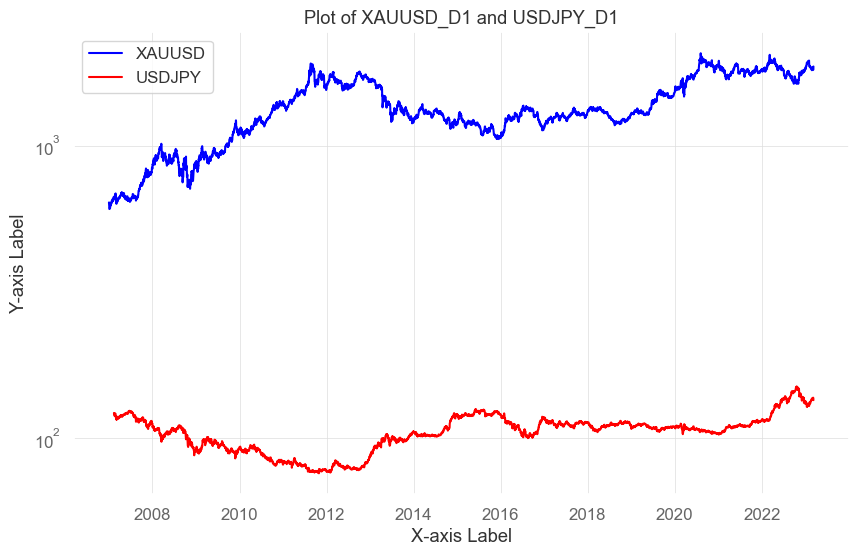

In [9]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [10]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [11]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                          6.029e+04
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        01:55:18   Log-Likelihood:                         -36815.
No. Observations:                4995   AIC:                                  7.363e+04
Df Residuals:                    4994   BIC:                                  7.364e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close         12.6192      0.051    245.544      0.000      12.518      12.720
==============================================================================
Omnibus:                       68.039   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.705
Skew:                           0.002   Prob(JB):                     1.45e-09
Kurtosis:                       2.558   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
result = KF.Run()

In [13]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         0.898406
Multiple (Buy-and-Hold):     3.701552
--------------------------------------
Out-/Underperformance:       -2.803146


CAGR:                        -0.006678
Annualized Mean:             -0.0067
Annualized Std:              0.025722
Sharpe Ratio:                -0.260496
Sortino Ratio:               -0.351334
Maximum Drawdown:            0.148535
Calmar Ratio:                -0.044959
Max Drawdown Duration:       5840 Days
Kelly Criterion:             -9.637491


### Save Result Backtest 

In [14]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [15]:
filename = f'{Currency_Pair}_{TF}.csv'

In [16]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -10.63%
CAGR﹪                     -0.48%

Sharpe                     -0.23
Prob. Sharpe Ratio         14.76%
Smart Sharpe               -0.23
Sortino                    -0.32
Smart Sortino              -0.31
Sortino/√2                 -0.22
Smart Sortino/√2           -0.22
Omega                      0.96

Max Drawdown               -15.12%
Longest DD Days            5727
Volatility (ann.)          2.31%
Calmar                     -0.03
Skew                       -0.69
Kurtosis                   7.93

Expected Daily %           -0.0%
Expected Monthly %         -0.06%
Expected Yearly %          -0.66%
Kelly Criterion            -2.24%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.24%
Expected Shortfall (cVaR)  -0.24%

Max Consecutiv

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-27,2019-06-19,2023-03-01,5727,-15.120839,-14.725955
2,2007-03-15,2007-04-20,2007-06-07,85,-0.462264,-0.460672
3,2007-06-13,2007-06-19,2007-06-25,13,-0.114121,-0.072894
4,2007-06-11,2007-06-11,2007-06-11,1,-0.052819,NaN
5,2007-03-07,2007-03-08,2007-03-12,6,-0.042488,-0.013158


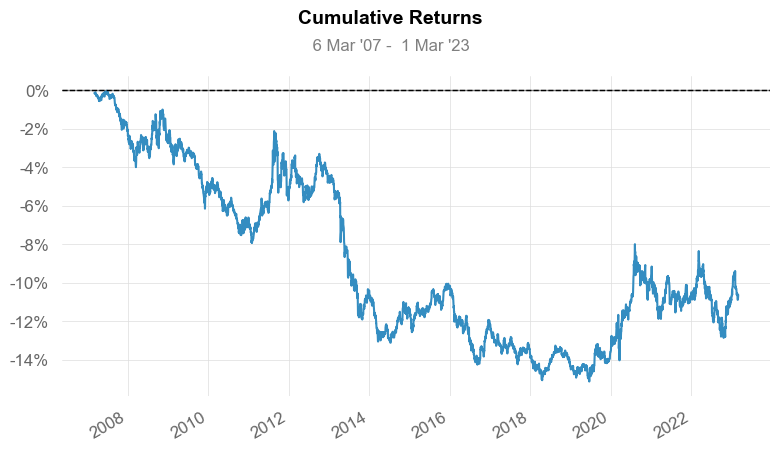

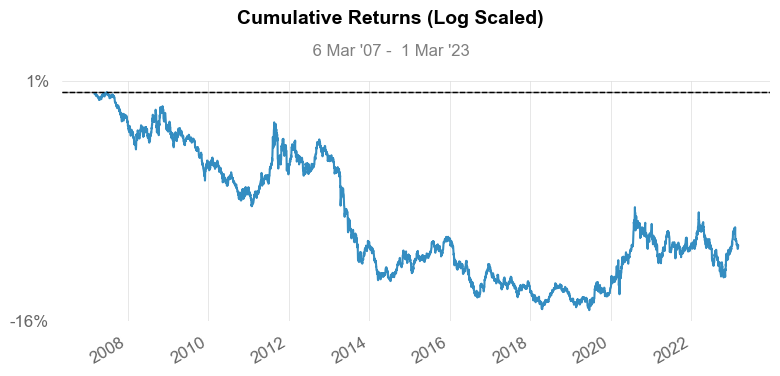

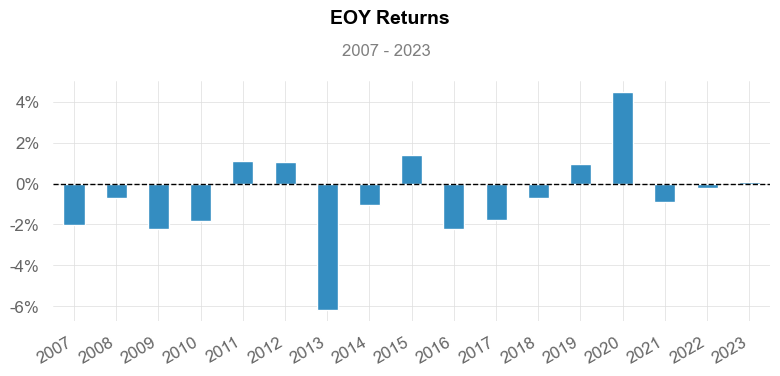

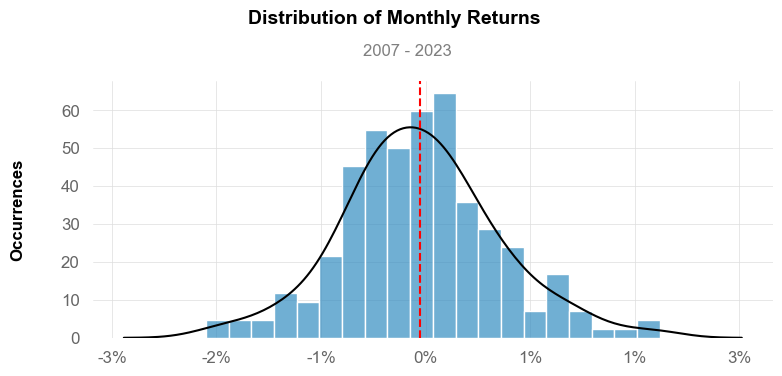

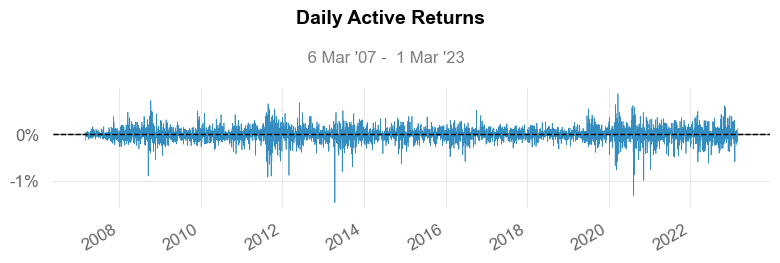

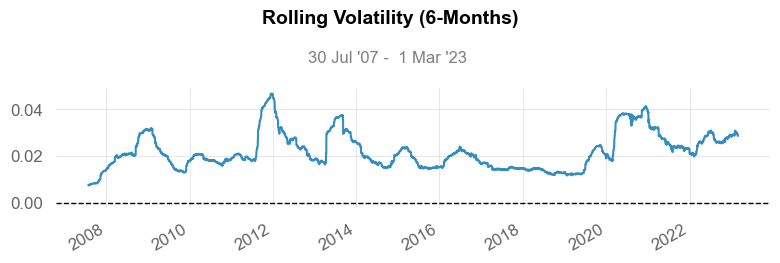

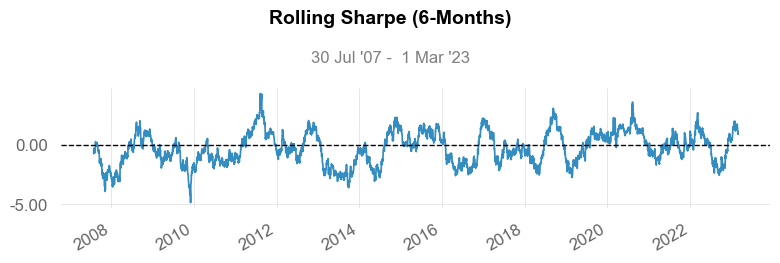

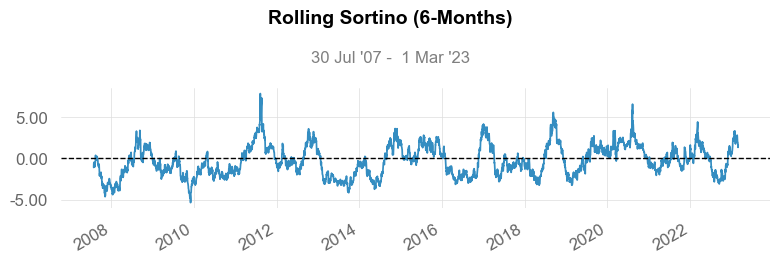

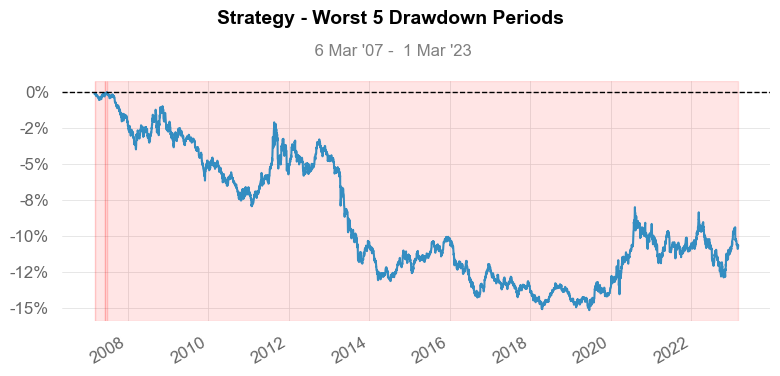

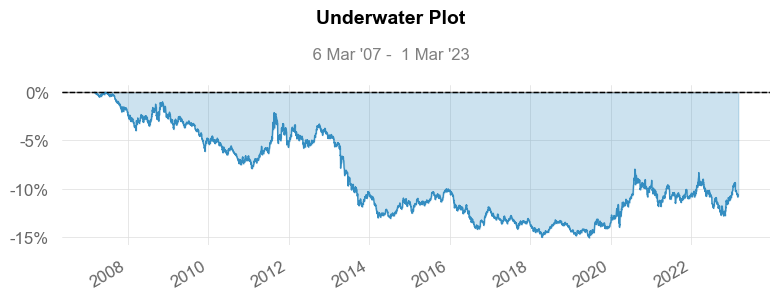

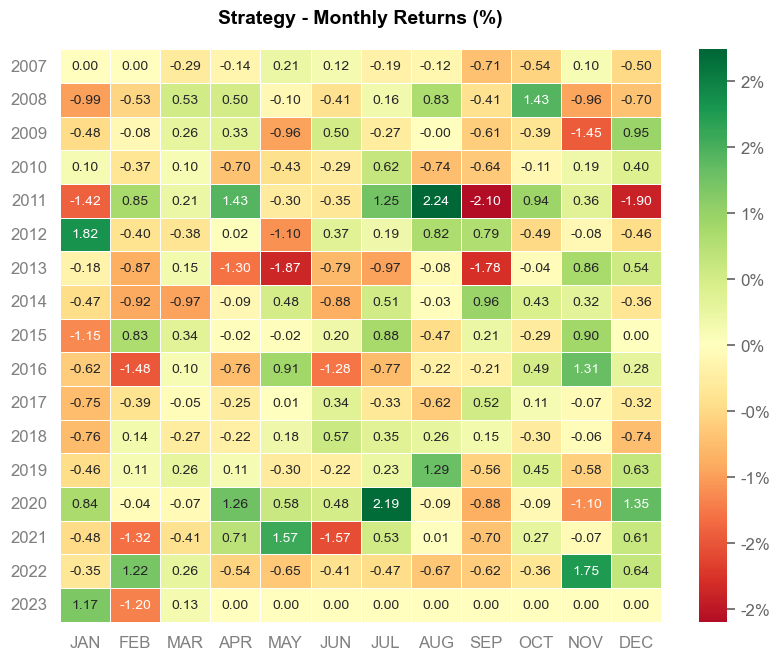

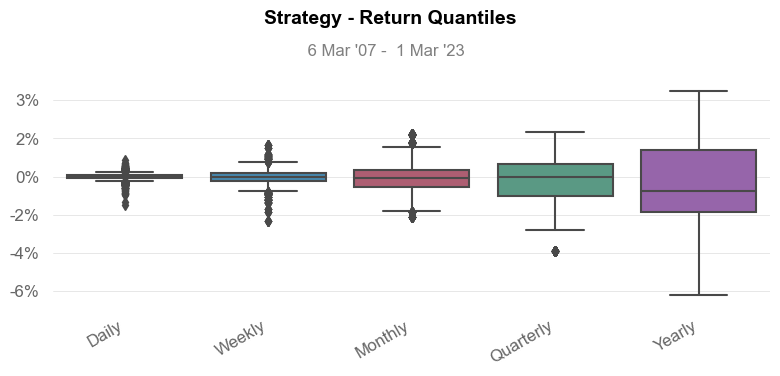

In [17]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change())

## TF H4

In [18]:
TF = 'H4'

In [19]:
data_1 = XAUUSD[TF]

In [20]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

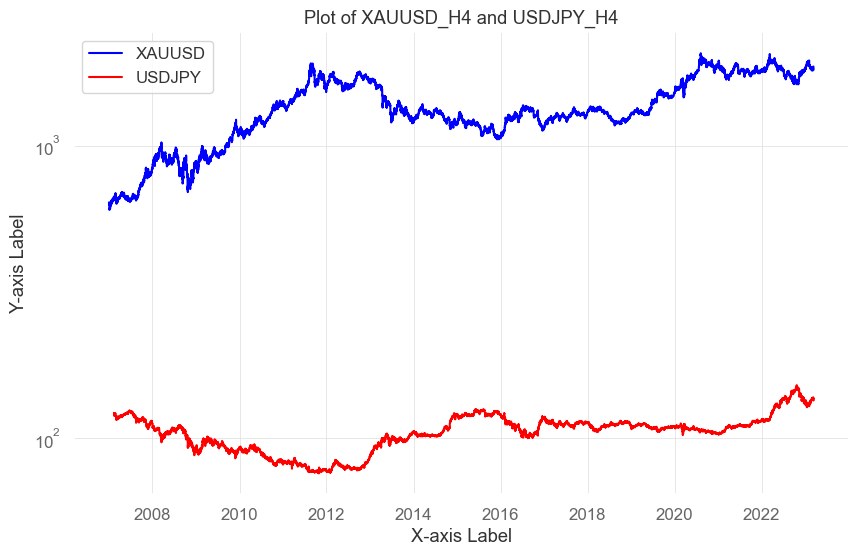

In [21]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [22]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [23]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                          3.104e+05
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        01:56:32   Log-Likelihood:                     -1.8969e+05
No. Observations:               25735   AIC:                                  3.794e+05
Df Residuals:                   25734   BIC:                                  3.794e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close         12.6202      0.023    557.102      0.000      12.576      12.665
==============================================================================
Omnibus:                      352.209   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.984
Skew:                           0.000   Prob(JB):                     4.17e-46
Kurtosis:                       2.559   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
result = KF.Run()

In [25]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         0.906192
Multiple (Buy-and-Hold):     3.644616
--------------------------------------
Out-/Underperformance:       -2.738424


CAGR:                        -0.006142
Annualized Mean:             -0.006161
Annualized Std:              0.025232
Sharpe Ratio:                -0.24416
Sortino Ratio:               -0.336735
Maximum Drawdown:            0.141672
Calmar Ratio:                -0.043352
Max Drawdown Duration:       5840 Days
Kelly Criterion:             -9.179381


### Save Result Backtest 

In [26]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [27]:
filename = f'{Currency_Pair}_{TF}.csv'

In [28]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -9.92%
CAGR﹪                     -0.45%

Sharpe                     -0.22
Prob. Sharpe Ratio         16.46%
Smart Sharpe               -0.22
Sortino                    -0.3
Smart Sortino              -0.29
Sortino/√2                 -0.21
Smart Sortino/√2           -0.21
Omega                      0.96

Max Drawdown               -14.4%
Longest DD Days            5727
Volatility (ann.)          2.29%
Calmar                     -0.03
Skew                       -0.66
Kurtosis                   7.99

Expected Daily %           -0.0%
Expected Monthly %         -0.05%
Expected Yearly %          -0.61%
Kelly Criterion            -2.08%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.24%
Expected Shortfall (cVaR)  -0.24%

Max Consecutive W

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-27,2019-06-19,2023-03-01,5727,-14.398798,-13.954620
2,2007-03-15,2007-04-20,2007-06-07,85,-0.461881,-0.460291
3,2007-06-13,2007-06-19,2007-06-25,13,-0.114026,-0.072834
4,2007-06-11,2007-06-11,2007-06-11,1,-0.052775,NaN
5,2007-03-07,2007-03-08,2007-03-12,6,-0.042452,-0.013147


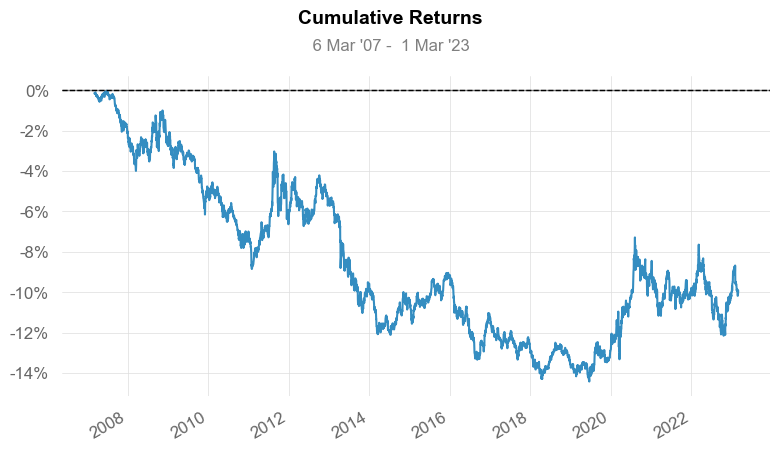

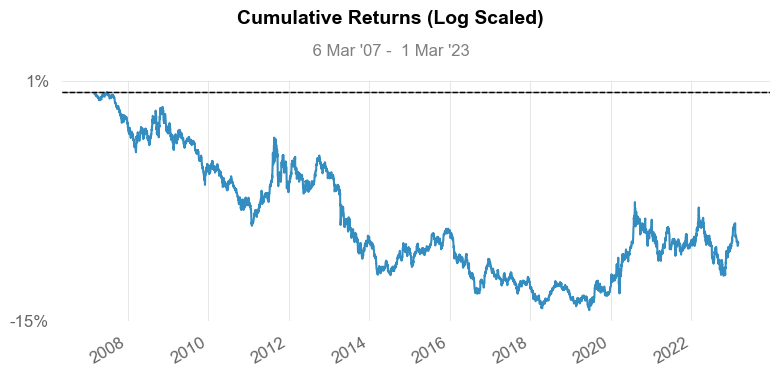

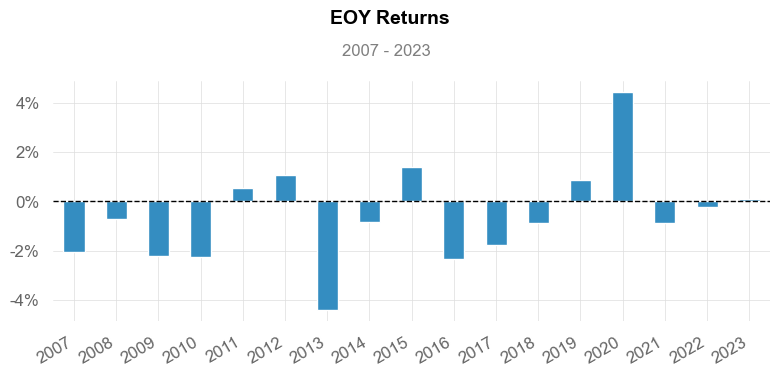

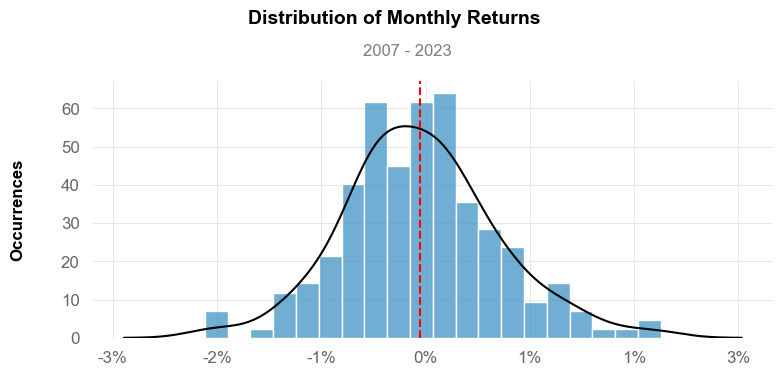

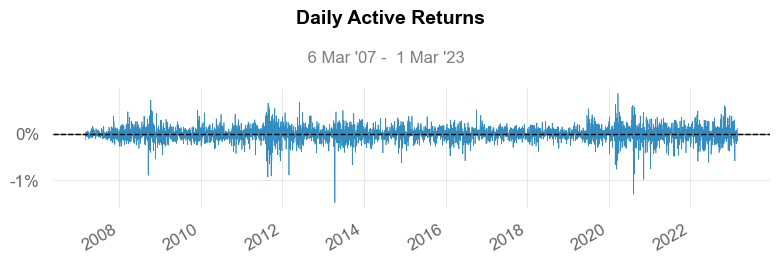

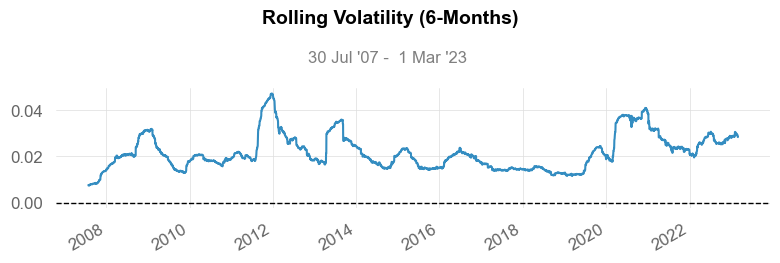

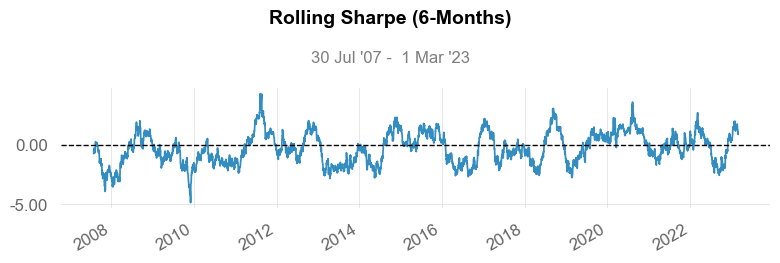

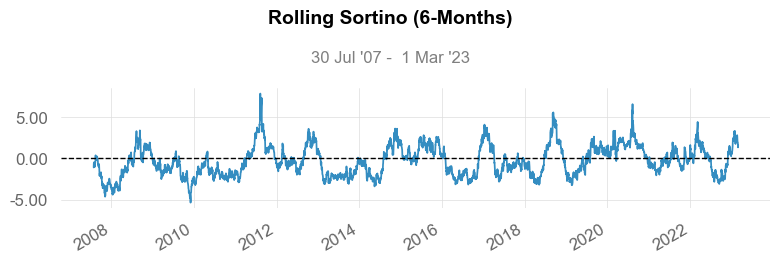

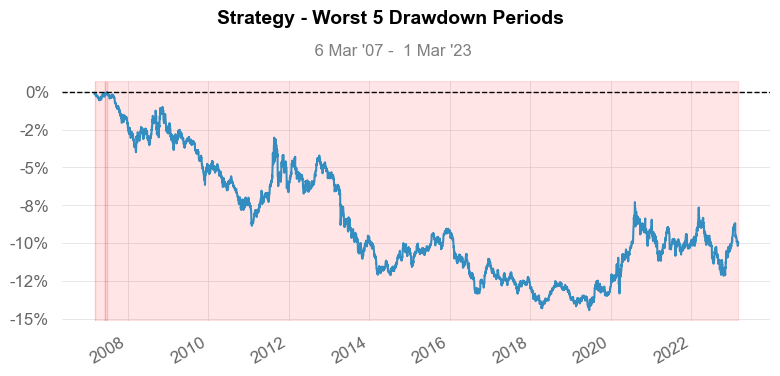

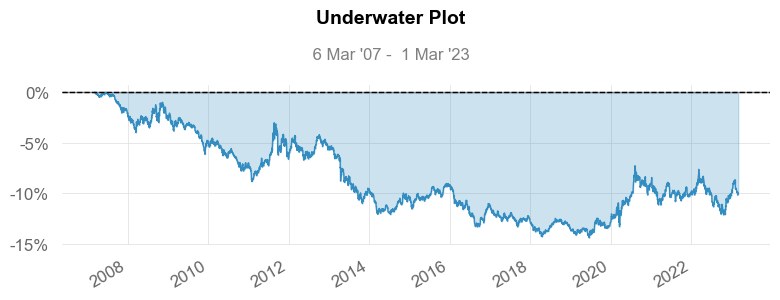

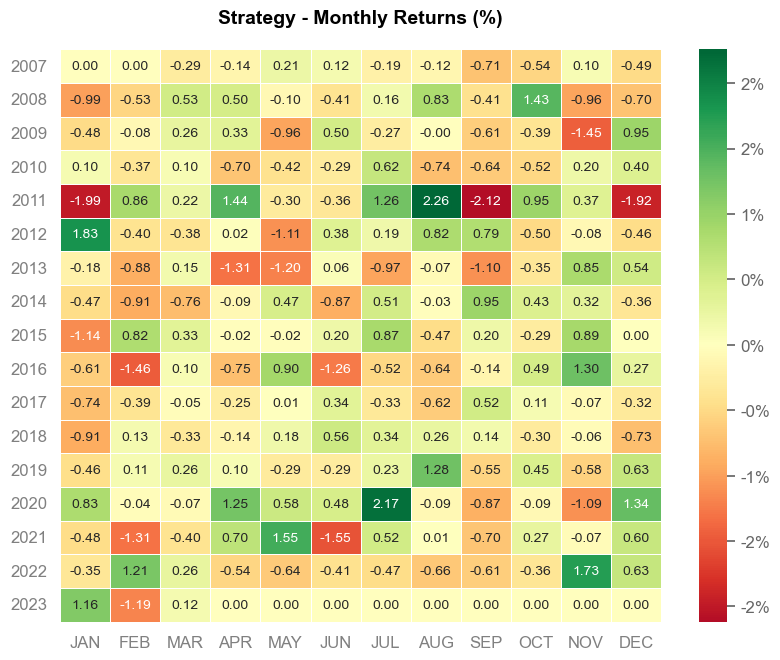

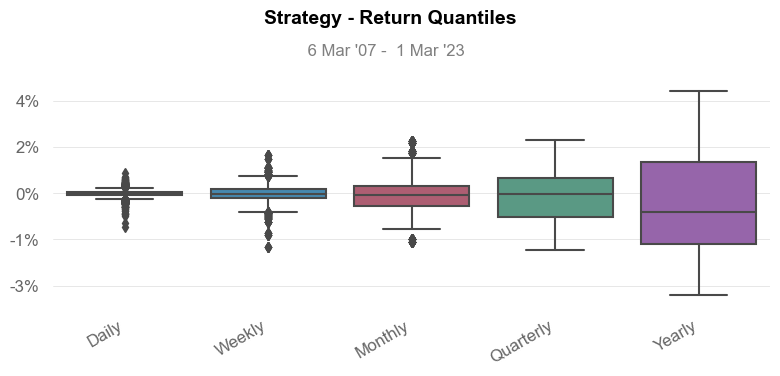

In [29]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change())

## TF H1

In [30]:
TF = 'H1'

In [31]:
data_1 = XAUUSD[TF]

In [32]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

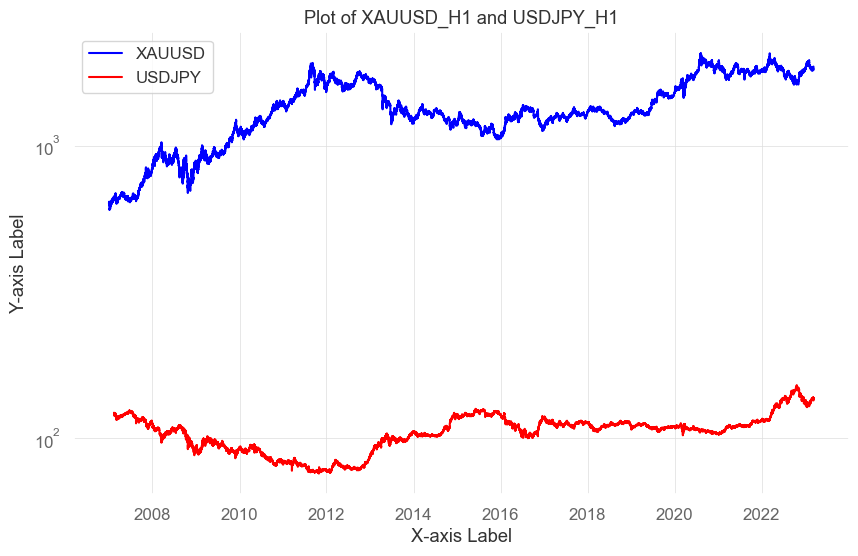

In [33]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [34]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [35]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                          1.201e+06
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        02:01:40   Log-Likelihood:                     -7.3358e+05
No. Observations:               99524   AIC:                                  1.467e+06
Df Residuals:                   99523   BIC:                                  1.467e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close         12.6207      0.012   1095.676      0.000      12.598      12.643
==============================================================================
Omnibus:                     1362.012   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              807.146
Skew:                          -0.000   Prob(JB):                    5.38e-176
Kurtosis:                       2.559   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
result = KF.Run()

### Save Result Backtest 

In [37]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [38]:
filename = f'{Currency_Pair}_{TF}.csv'

In [39]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -9.46%
CAGR﹪                     -0.43%

Sharpe                     -0.21
Prob. Sharpe Ratio         17.65%
Smart Sharpe               -0.21
Sortino                    -0.28
Smart Sortino              -0.28
Sortino/√2                 -0.2
Smart Sortino/√2           -0.2
Omega                      0.96

Max Drawdown               -13.94%
Longest DD Days            5727
Volatility (ann.)          2.29%
Calmar                     -0.03
Skew                       -0.62
Kurtosis                   8.02

Expected Daily %           -0.0%
Expected Monthly %         -0.05%
Expected Yearly %          -0.58%
Kelly Criterion            -1.98%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.24%
Expected Shortfall (cVaR)  -0.24%

Max Consecutive W

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-27,2019-06-19,2023-03-01,5727,-13.942095,-13.461954
2,2007-03-15,2007-04-20,2007-06-07,85,-0.461810,-0.460220
3,2007-06-13,2007-06-19,2007-06-25,13,-0.114009,-0.072823
4,2007-06-11,2007-06-11,2007-06-11,1,-0.052767,NaN
5,2007-03-07,2007-03-08,2007-03-12,6,-0.042446,-0.013145


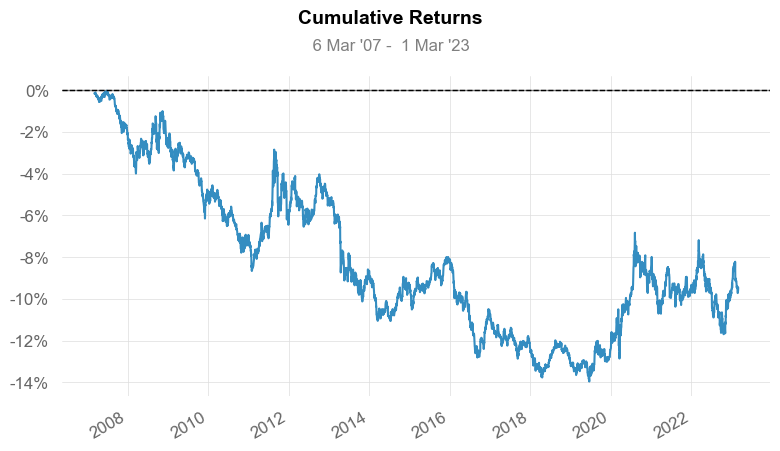

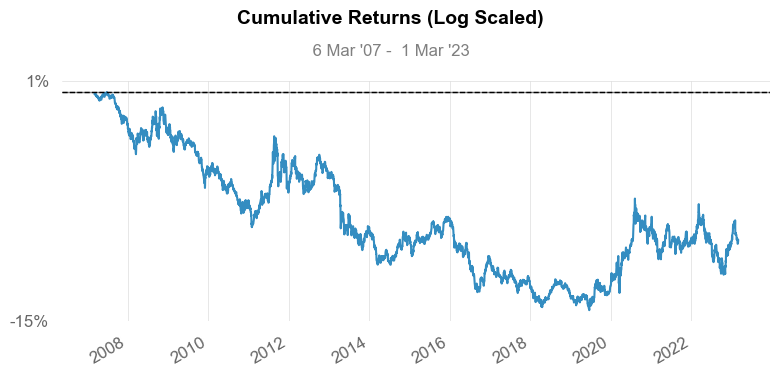

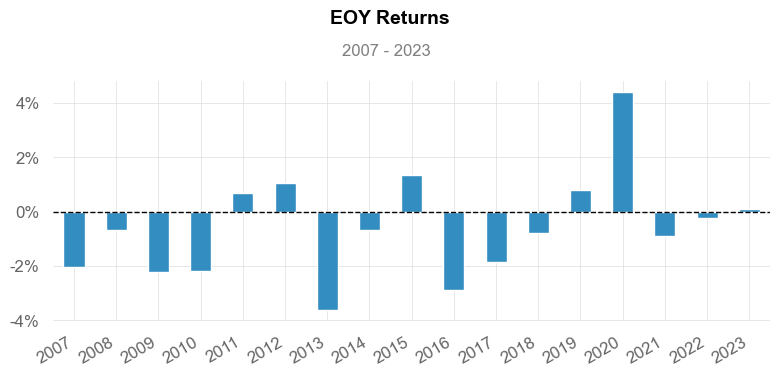

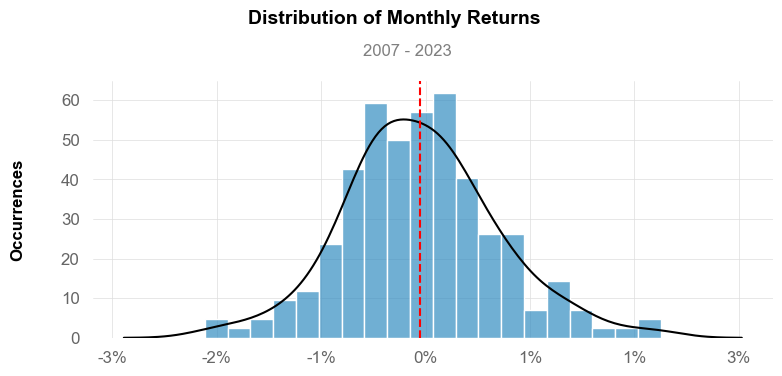

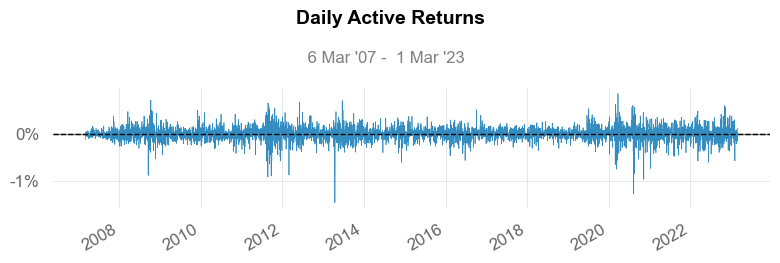

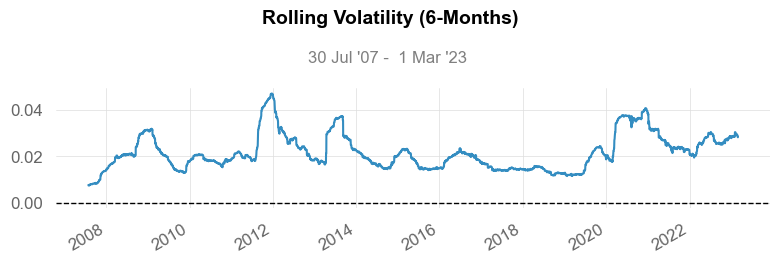

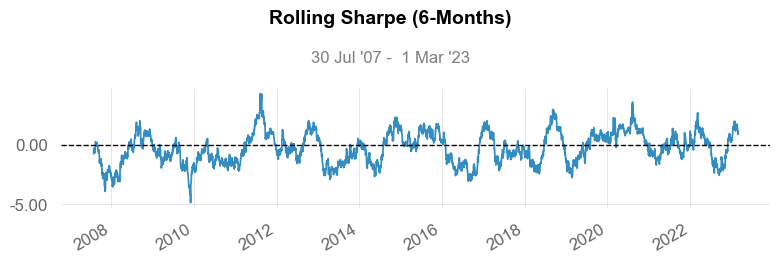

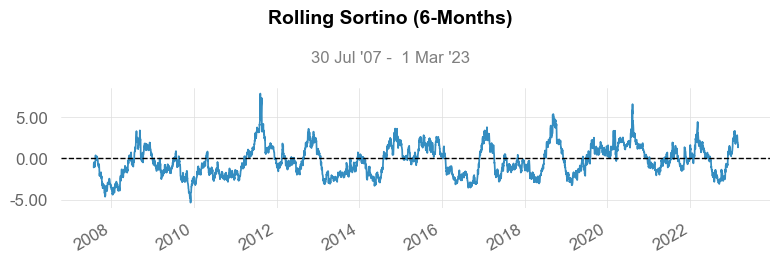

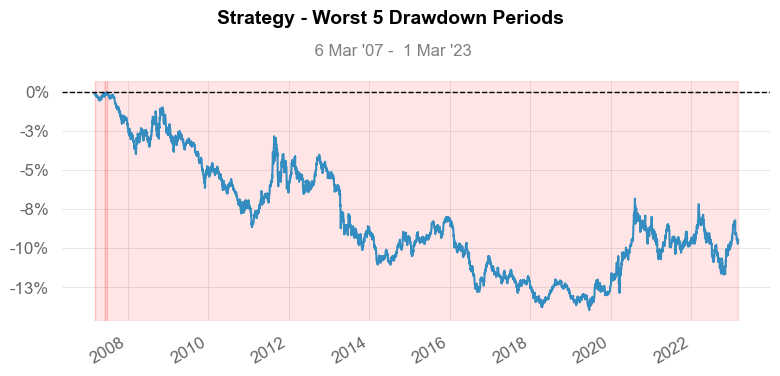

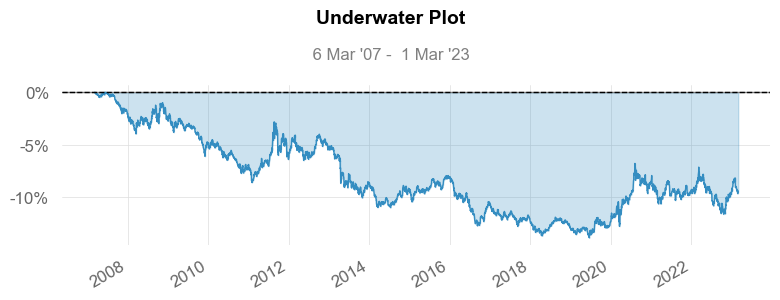

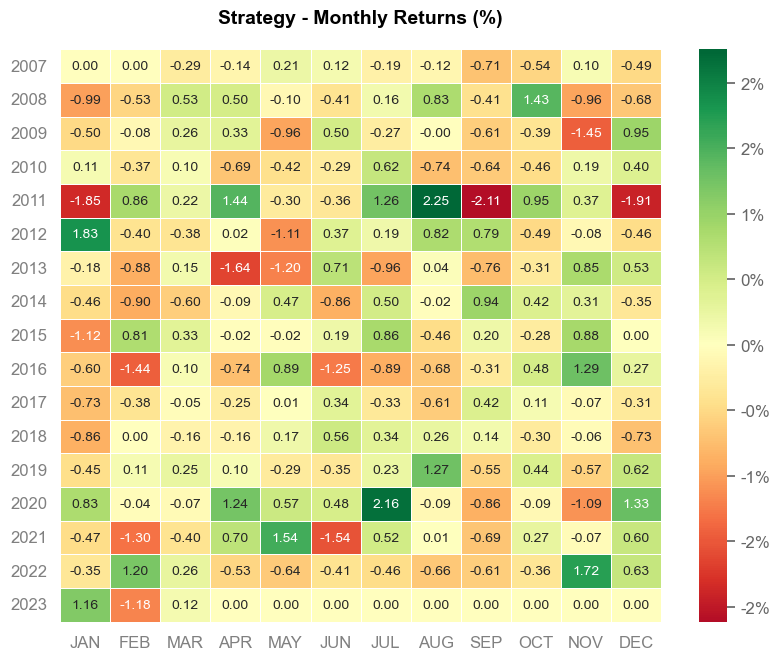

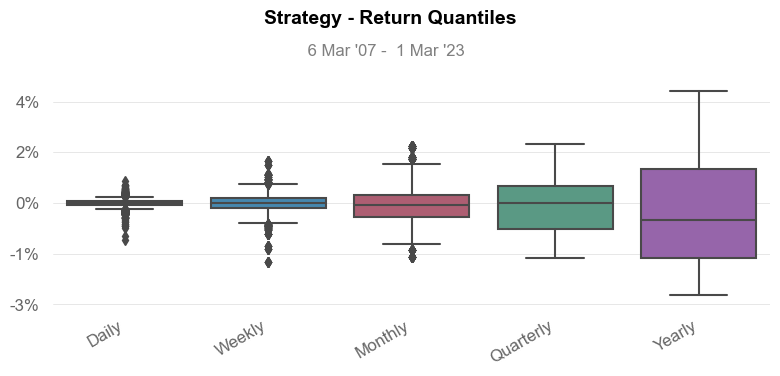

In [40]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change().resample('D').last().dropna())

## TF H30

In [41]:
TF = 'M30'

In [42]:
data_1 = XAUUSD[TF]

In [43]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

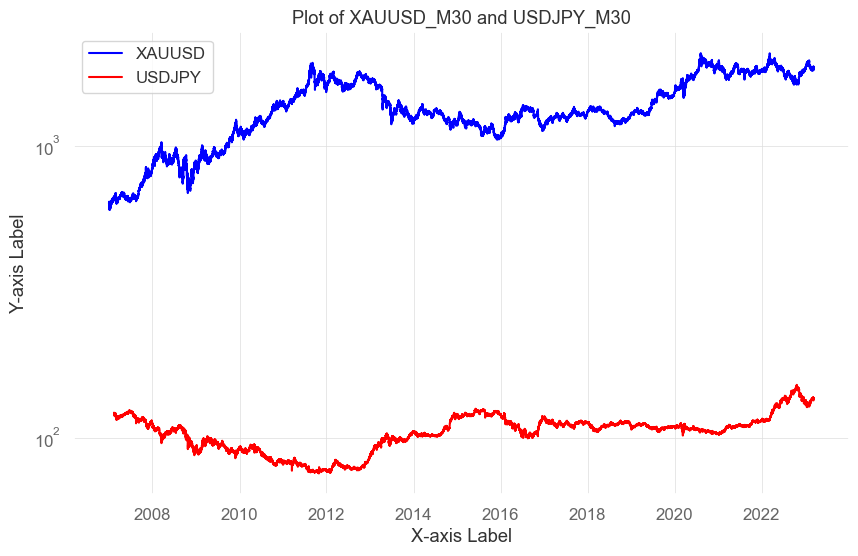

In [44]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [45]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [46]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                          2.401e+06
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        02:17:12   Log-Likelihood:                     -1.4668e+06
No. Observations:              198996   AIC:                                  2.934e+06
Df Residuals:                  198995   BIC:                                  2.934e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close         12.6216      0.008   1549.502      0.000      12.606      12.638
==============================================================================
Omnibus:                     2716.268   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1610.342
Skew:                          -0.001   Prob(JB):                         0.00
Kurtosis:                       2.559   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
result = KF.Run()

### Save Result Backtest 

In [48]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [49]:
filename = f'{Currency_Pair}_{TF}.csv'

In [50]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -10.08%
CAGR﹪                     -0.46%

Sharpe                     -0.22
Prob. Sharpe Ratio         15.97%
Smart Sharpe               -0.22
Sortino                    -0.3
Smart Sortino              -0.3
Sortino/√2                 -0.21
Smart Sortino/√2           -0.21
Omega                      0.96

Max Drawdown               -14.57%
Longest DD Days            5727
Volatility (ann.)          2.29%
Calmar                     -0.03
Skew                       -0.64
Kurtosis                   7.92

Expected Daily %           -0.0%
Expected Monthly %         -0.06%
Expected Yearly %          -0.62%
Kelly Criterion            -2.12%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.24%
Expected Shortfall (cVaR)  -0.24%

Max Consecutive 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-27,2019-06-19,2023-03-01,5727,-14.566458,-14.070418
2,2007-03-15,2007-04-20,2007-06-07,85,-0.461736,-0.460147
3,2007-06-13,2007-06-19,2007-06-25,13,-0.113990,-0.072811
4,2007-06-11,2007-06-11,2007-06-11,1,-0.052758,NaN
5,2007-03-07,2007-03-08,2007-03-12,6,-0.042439,-0.013143


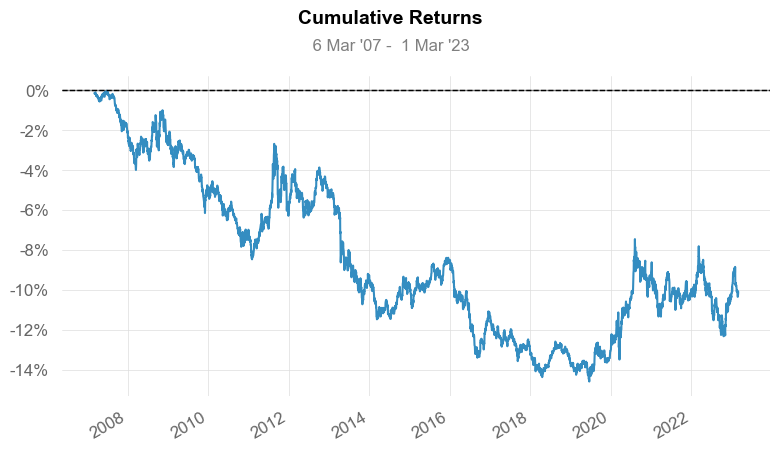

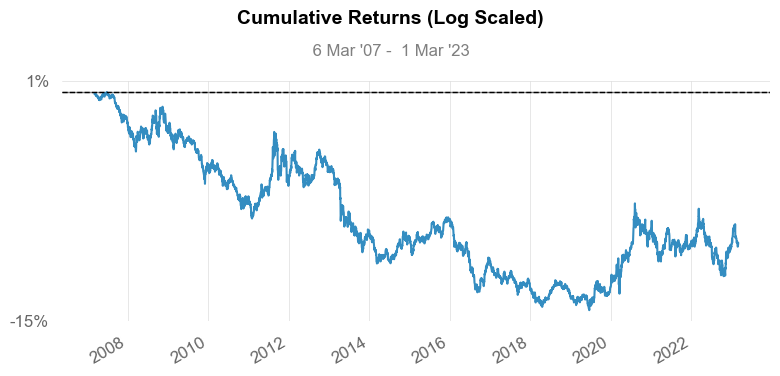

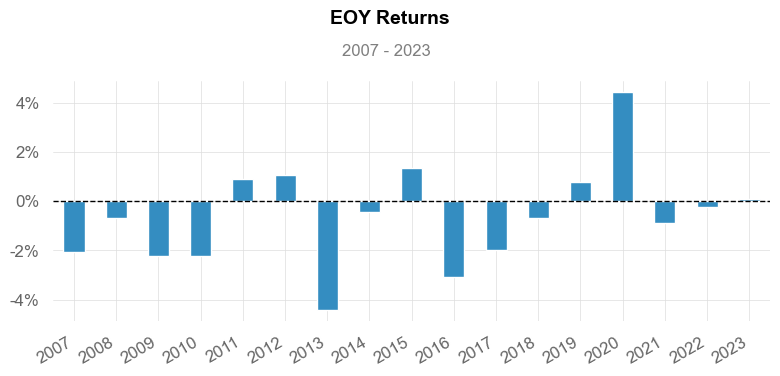

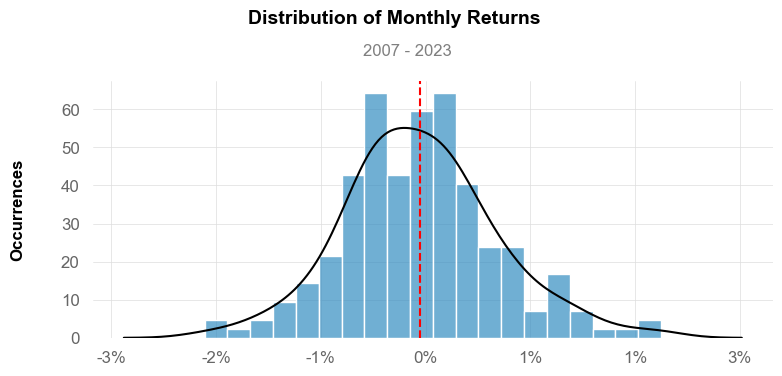

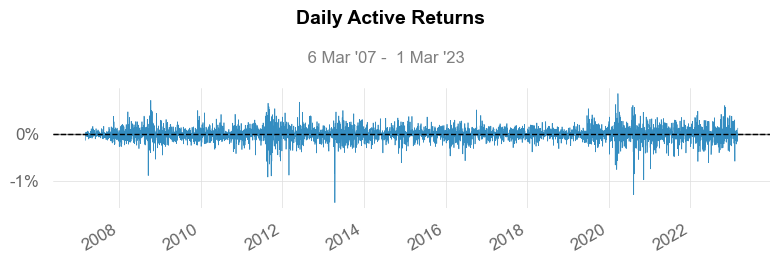

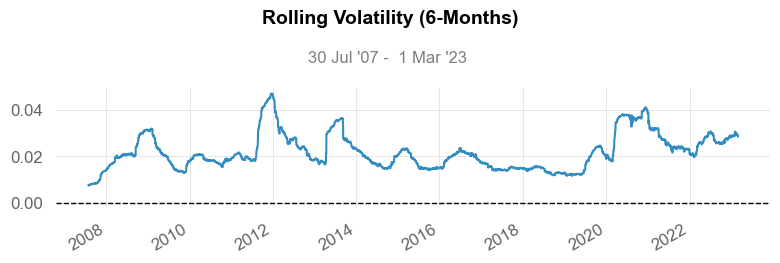

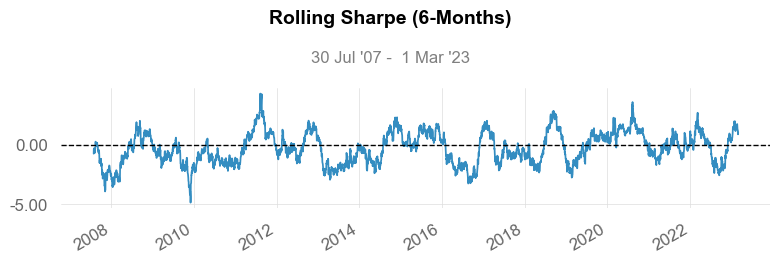

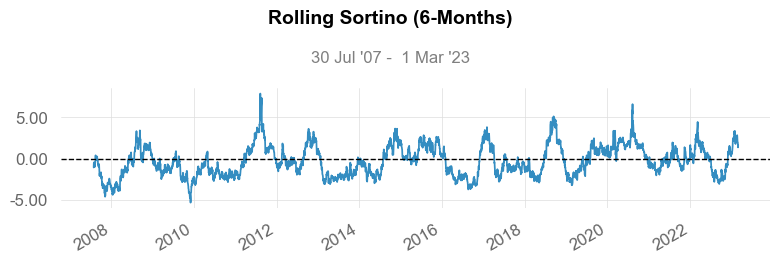

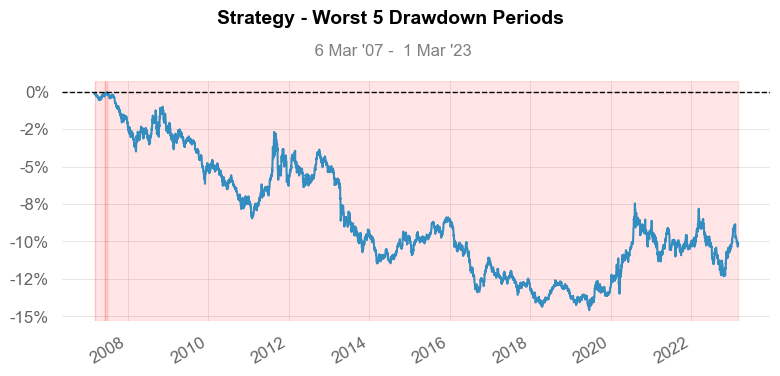

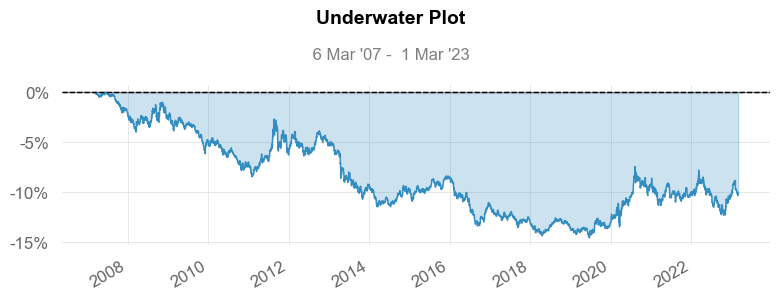

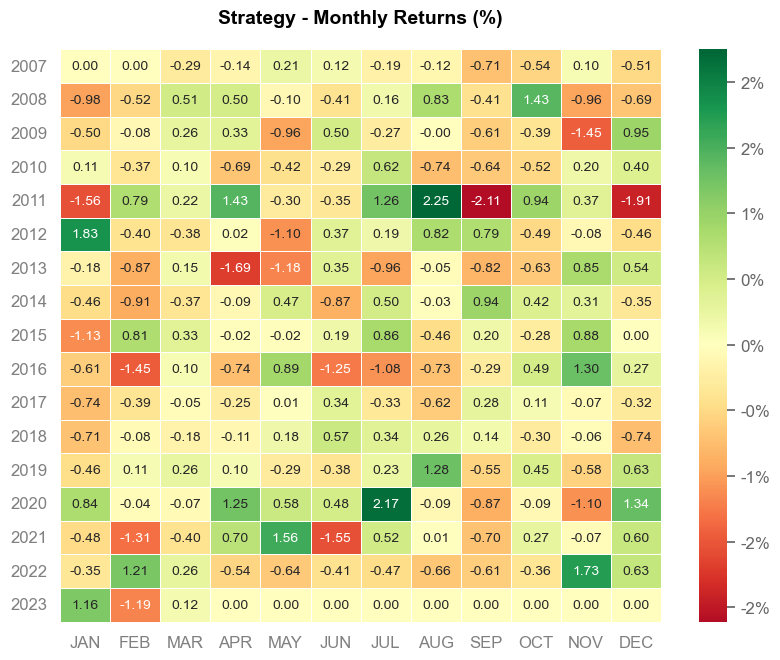

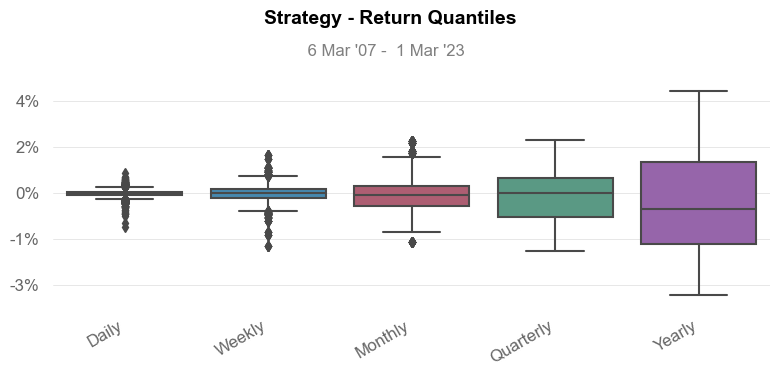

In [51]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change().resample('D').last().dropna())